In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing Libraries

In [2]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.special import softmax

Function for calculating accuracy

In [3]:
def calculateAccuracy(A, B):
  counter = 0
  for i in range(0, len(A)):
    if(A[i] == B[i]):
      counter += 1
  return (counter / len(A)) * 100

Loading happy images

In [4]:
happyImages = [
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject01.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject02.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject04.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject06.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject07.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject09.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject10.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject12.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject13.happy.gif').resize((100, 100))))]


happyImages = np.array(happyImages)/255
# happyImages = happyImages.T
print(happyImages.shape)

(9, 10000)


Loading sad images

In [5]:
sadImages = [
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject02.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject03.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject04.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject05.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject06.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject07.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject09.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject10.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject11.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject12.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject13.sad.gif').resize((100, 100)))),]

sadImages = np.array(sadImages)/255
# sadImages = sadImages.T
print(sadImages.shape)

(11, 10000)


Combining both sad and happy images

In [6]:
trainData = np.concatenate((happyImages, sadImages), axis=0)
trainData.shape

(20, 10000)

Loading training labels

In [7]:
trainLabels = []
temp1 = []
temp2 = []
for i in range(0, 20):
  if i < 9:
    temp1.append(1)
    temp2.append(0)
  else:
    temp1.append(0)
    temp2.append(1)
trainLabels.append(temp1)
trainLabels.append(temp2)
trainLabels = np.array(trainLabels)
trainLabels.shape

(2, 20)

Loading test data

In [8]:
testData = []
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject03.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject05.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject08.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject11.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject14.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject15.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject01.sad.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject08.sad.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject14.sad.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject15.sad.gif').resize((100,100)))))
testData = np.array(testData)/255
testData.shape

(10, 10000)

Loading test labels

In [9]:
testLabels = []
for i in range(0, 10):
  if i < 6:
    testLabels.append(0)
  else:
    testLabels.append(1)
testLabels = np.array(testLabels)
testLabels = testLabels.T
testLabels = np.reshape(testLabels, (1, 10))
testLabels

array([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

Applying PCA on train data

In [10]:
PCAObject = PCA(n_components = 12)
PCAData = PCAObject.fit_transform(trainData)
PCAData = PCAData.T
trainPCAData = PCAData
trainPCAData.shape

(12, 20)

Transform test data

In [11]:
testPCAData = PCAObject.transform(testData)
testPCAData = testPCAData.T
testPCAData.shape

(12, 10)

Function for ReLu

In [12]:
def ReLu(x,state):
    if state == 'derivative':
        return x>0
    else:
        return np.maximum(0,x)

In [13]:
def randomWeights():
    W1 = np.random.randn(10, 12)
    W2 = np.random.randn(2, 10)
    return W1, W2

In [14]:
def randomBias():
    B1 = np.random.randn(10, 1)
    matrix = np.matrix(np.zeros((10,20)))
    B1 = matrix + B1

    B2 = np.random.randn(2, 1)
    matrix = np.matrix(np.zeros((2,20)))
    B2 = matrix + B2
    return B1, B2

Neural Network with forward and backward propagation

In [15]:
class NeuralNetwork():
    def __init__(self, learningRate, inputData, targetData, numberOfIteration, hiddenLayerSize):
        self.learningRate = learningRate
        self.inputData = inputData
        self.targetData = targetData
        self.numberOfIteration = numberOfIteration
        self.hiddenLayerSize = hiddenLayerSize
        self.weight1, self.weight2 = self.randomWeights()
        self.bias1, self.bias2 = self.randomBias()
        self.inputLayerSize = inputData.shape[1]
        self.outputLayerSize = 2
        self.m = 20
        
    def randomWeights(self):
        W1 = np.random.randn(self.hiddenLayerSize, 12)
        W2 = np.random.randn(2, self.hiddenLayerSize)
        return W1, W2
    
    def randomBias(self):
        B1 = np.random.randn(self.hiddenLayerSize, 1)
        matrix = np.matrix(np.zeros((self.hiddenLayerSize, 20)))
        B1 = matrix + B1

        B2 = np.random.randn(2, 1)
        matrix = np.matrix(np.zeros((2,20)))
        B2 = matrix + B2
        return B1, B2

    def crossEntropy(self, predictions, targets, epsilon=1e-12):
        ce = np.sum(np.multiply(targets, np.log(predictions+1e-9))) / 20
        return ce

    def forwardPropagation(self, data, mode):
        if(mode == 'train'):
            self.Z1 = np.dot(self.weight1 , data) + self.bias1
            self.A1 = ReLu(self.Z1, 'normal')
            self.Z2 = np.dot(self.weight2 , self.A1) + self.bias2
            self.Y = self.A2 = softmax(self.Z2, axis = 0)
        else:
            b1 = self.bias1[:, :data.shape[1]]
            b2 = self.bias2[:, :data.shape[1]]
            self.Z1 = np.dot(self.weight1 , data) + b1
            self.A1 = ReLu(self.Z1, 'normal')
            self.Z2 = np.dot(self.weight2 , self.A1) + b2
            self.Y = self.A2 = softmax(self.Z2, axis = 0)
        return self.Y
    
    def backwardPropagation(self):
        dz2 = self.Y - self.targetData
        dw2 = dz2 @ self.A1.T
        db2 = np.sum(dz2, axis = 1)
        matrix = np.matrix(np.zeros((2,20)))
        db2 = matrix + db2

        dz1 = np.multiply((self.weight2.T @ dz2), ReLu(self.A1, 'derivative'))
        dw1 = dz1 @ self.inputData.T
        db1 = np.sum(dz1, axis = 1)
        matrix = np.matrix(np.zeros((self.hiddenLayerSize,20)))
        db1 = matrix + db1

        self.weight1 = self.weight1 - (self.learningRate * dw1)
        self.weight2 = self.weight2 - (self.learningRate * dw2)

        self.bias1 = self.bias1 - (self.learningRate * db1)
        self.bias2 = self.bias2 - (self.learningRate * db2)

    def train(self):
        lossFuncList = []
        for _ in range(self.numberOfIteration):
            Y = self.forwardPropagation(self.inputData, 'train')
            lossFuncList.append(self.crossEntropy(Y, self.targetData))
            self.backwardPropagation()
        self.plotter(lossFuncList)

    def plotter(self, lossFun):
        lossFun = -1 * np.array(lossFun)
        u = np.arange(start=1, stop=21, step=1)
        plt.xlabel('Epoch number')
        plt.ylabel('Loss Function')
        plt.title('Loss function for Train data')
        plt.plot(u,lossFun)
        plt.show()
    

In [16]:
def trainFunction(hiddenLayers):
    NNObject = NeuralNetwork(
        learningRate = 0.015,
        inputData = trainPCAData,
        targetData = trainLabels,
        numberOfIteration = 20,
        hiddenLayerSize = hiddenLayers
    )
    NNObject.train()

    prediction = NNObject.forwardPropagation(testPCAData, 'test')
    prediction = np.argmax(prediction, axis = 0)
    return (np.sum(prediction == testLabels)/10)*100
    # print((np.sum(prediction == testLabels)/10)*100)

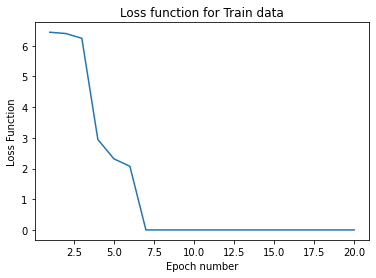

Hidden Layer size: 10, Accuracy : 80.0
#####################################################################


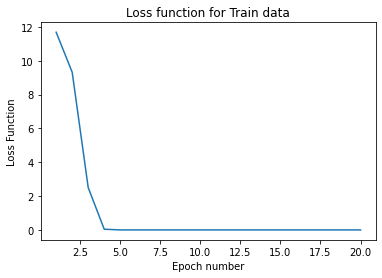

Hidden Layer size: 15, Accuracy : 90.0
#####################################################################


In [22]:
sum = []
sum.append(trainFunction(10))
print(f'Hidden Layer size: {10}, Accuracy : {sum[0]}')
print("#####################################################################")
sum.append(trainFunction(15))
print(f'Hidden Layer size: {15}, Accuracy : {sum[1]}')
print("#####################################################################")


# By increasing the number of hidden layer units there is an increment in the accuracy.